<font size = 6>
Отбор данных одномерной выборки

Выполнил - Руслан Карабалин

Цель работы - очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений

## Введение

### Подключаем библиотеки pandas, matplotlib.pyplot, numpy, stats:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Импортируем данные

In [2]:
ds1 = pd.read_csv("drive/MyDrive/python/ml/lab1/ML.ds1.csv")
ds1.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75
0,1.674664,-0.105114,1.123071,0.159780,-2.653400,0.731480,0.248630,-2.411234,0.975680,9.011194,...,0.635269,0.766523,1.108400,1.075446,6.565005,0.839696,0.496592,0.728681,-1.186913,0.871300
1,1.815983,0.793212,0.437694,1.374387,-0.055956,0.678019,0.245999,2.632142,1.094653,1.099596,...,0.967244,0.973246,4.109887,1.034150,9.851633,7.415128,0.583847,1.338758,2.582966,1.162462
2,0.777174,-1.030174,0.439461,1.371726,1.605366,0.695225,0.969702,2.473882,0.910368,4.997584,...,0.517114,5.820453,-2.094585,1.047369,9.560367,-1.748572,0.778761,1.445412,-4.385701,0.858215
3,1.030925,1.576539,0.906160,1.028792,-0.723862,0.626546,0.321099,-4.724615,1.039090,6.129512,...,0.627821,0.499243,-7.330234,0.768444,2.383294,1.495813,0.833851,1.649441,-0.528993,0.695496
4,0.872935,-0.723648,1.163915,3.085364,0.129386,0.896113,1.215447,0.969162,0.972609,7.535088,...,0.589966,1.972031,0.225700,0.943955,8.833605,11.804698,0.518266,1.615040,0.328252,1.025233


### Выделим в отдельную таблицу столбец v33 и переименуем его в s33

In [3]:
ds = ds1[["v33"]].rename(columns = {"v33": "s33"})
ds

,s33
0,0.809186
1,0.954303
2,0.901974
3,0.670936
4,1.155048
...,...
495,1.098500
496,0.957448
497,0.723273
498,1.139317


### Нахождение описательной статистики выборки

Вычисление числовых характеристик выборки

In [ ]:
c = ds["s33"]

s33_mean = c.mean()
s33_std = c.std()
s33_median = c.median()
s33_skew = c.skew()

Создание таблицы характеристик

In [ ]:
names = ["mean", "std", "median", "skew"]
values = [s33_mean, s33_std, s33_median, s33_skew]
df = pd.DataFrame(values, names, columns=["Value"]).T
df

,mean,std,median,skew
Value,0.942904,0.124064,0.955206,-0.507232


**mean** - выборочное среднее, т.е. оценка математического ожидания генеральной совокупности, представленной имеющейся выборкой.

**std** - выборочное cтандартное отклонение, т.е. оценка среднеквадратического отклонения генеральной совокупности, представленной имеющейся выборкой.

**median** - выборочная медиана, т.е. оценка медианы генеральной совокупности, представленной имеющейся выборкой.

**skew** - выборочный коэффициент асимметрии, т.е. оценка коэффициента асимметрии генеральной совокупности, представленной имеющейся выборкой.

## Визуализация данных

### Диаграмма рассеяния выборки

Построим диаграмму рассеяния, расположив выборочные значения по горизонтальной оси, а номер наблюдения по вертикальной:

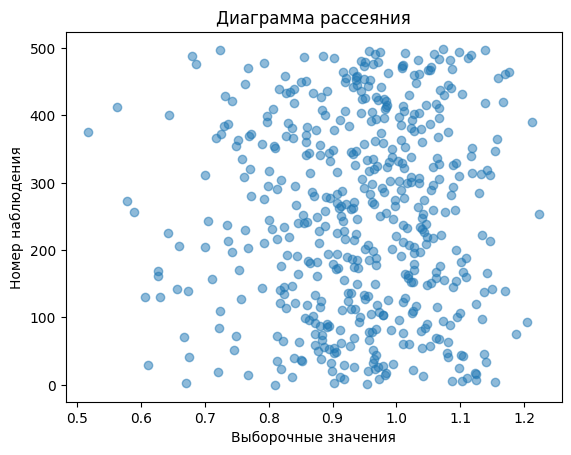

In [ ]:
plt.title("Диаграмма рассеяния")
plt.xlabel("Выборочные значения")
plt.ylabel("Номер наблюдения")
plt.scatter(ds, ds.index, alpha = 0.5)

Вывод:
- В выборке, скорее всего, есть аномальные данные
- Распределения генеральной совокупности не семметрична, пологая часть кривой распределения расположена слева


### Диаграмма размаха

Построим диаграмму размаха, расположив выборочные значения по горизонтальной оси

{'whiskers': [<matplotlib.lines.Line2D at 0x7a7f2ea8ef80>,
 'caps': [<matplotlib.lines.Line2D at 0x7a7f2ea8f4c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a7f2ea8ebf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a7f2ea8fa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a7f2ea8fca0>],
 'means': []}

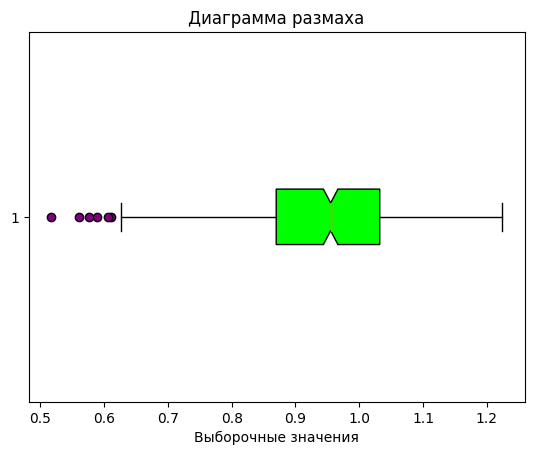

In [ ]:
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")
plt.boxplot(ds, vert=False, notch = True, patch_artist = True, flierprops = dict(markerfacecolor = 'purple'), boxprops = dict(facecolor = 'lime' ))

Вывод:
- В выборке, скорее всего, есть аномальные данные
- Распределения генеральной совокупности не семметрична ("усы" разной длины), пологая часть кривой распределения расположена слева


### Гистограмма

Построим гистограмму, расположив относительную частоту по вертикальной оси, а выборочные значения по горизонтальной, и добавим на нее график нормального распределения:

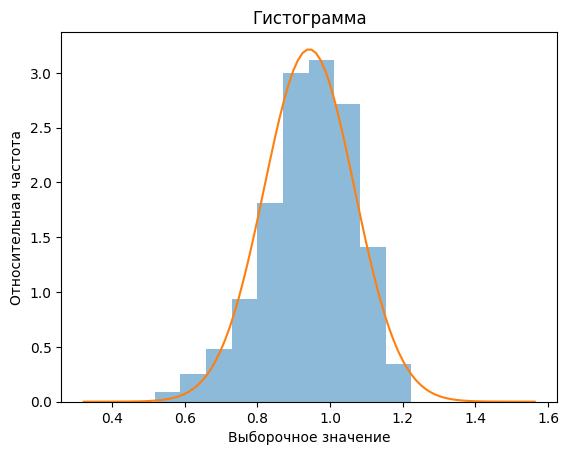

In [ ]:
plt.title("Гистограмма")
plt.xlabel("Выборочное значение")
plt.ylabel("Относительная частота")
plt.hist(ds, density=True, alpha=0.5)

x = np.linspace(s33_mean - 5 * s33_std, s33_mean + 5 * s33_std, 100)
plt.plot(x, stats.norm.pdf(x, s33_mean, s33_std))

Вывод:
- В выборке, скорее всего, есть аномальные данные
- Распределение генеральной совокупности является несемметричным, пологая часть кривой распределения расположена слева


#### Итог анализа данных:
- В выборке присутствуют аномальные данные
- Распределение генеральной совокупности является несемметричным, пологая часть кривой распределения расположена слева

## Проверка на симметричность

### Первый тест, основанный на сравнении выборочного среднего с выборочной медианой, вычисляем наблюдаемое значение и критическое:

In [ ]:
n = c.size
xn1 = np.absolute(s33_mean - s33_median)
xk1 = 3 * s33_std / np.sqrt(n)
print(xn1, xk1)
xn1 > xk1

0.012302622637834104 0.016644952361377165


False

Наблюдаемое значение меньше критического, значит, тест не опровергает гипотезу о симметричности генеральной совокупности

### Второй тест, основанный на оценке величины выборочного коэффициента асимметричности, вычисляем наблюдаемое значение и критическое:

In [ ]:
 xn2 = np.absolute(s33_skew)
 xk2 = 3 * np.sqrt(6 * (n - 1) / ((n + 1) * (n + 3)))
 print(xn2, xk2)
 xn2 > xk2

0.5072320219010046 0.3269973982840565


True

Наблюдаемое значение больше критического, значит, тест опровергает гипотезу о симметричности генеральной совокупности

#### Вывод

На основании диаграмм и тестов можно сделать вывод, что гипотеза о симметричности генеральной совокупности опровергнута

## Отбор данных

Гипотеза о симметричности генеральной совокупности опровергнута, поэтому проведём отбор на интервале $(\overline x - 5s, \overline x + 5s)$, где:
- $\overline x$ - выборочное среднее;
- $s$ - несмещенное выборочное среднее квадратическое отклонение (выборочное стандартное отклонение).

Вычислим границы интервала:

In [ ]:
A = s33_mean - 5 * s33_std
B = s33_mean + 5 * s33_std
A, B

(0.32258296942023945, 1.5632244681630723)

Найдём аномальные значения, лежащие вне интервала:

In [ ]:
anomaly = ds[(ds.s33 <= A) | (ds.s33 >= B)]
anomaly

,s33


Аномальных данных обнаружено не было

Можно не вводить новую таблицу, так как не требуется очищать её от аномальных данных

## Заключение

Целью работы была очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений. Цель достигнута.

Были использованы библиотеки: `pandas`, `matplotlib.pyplot`, `numpy` и `scipy.stats`.

В ходе работы были построены и проанализированы диаграммы рассеяния, размаха и гистограмма. На основе данного анализа сделан предварительный вывод о возможной несимметричности генеральной совокупности.

На основании двух тестов гипотеза о симметричности генеральной совокупности была опровергнута.

На основании сделанного вывода определили интервал, вне которого лежат выбросы, но аномальных данных обнаружено не было.